On peut visualiser une matrice $$A = \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}$$ comme un "warp" de l'espace uniforme:

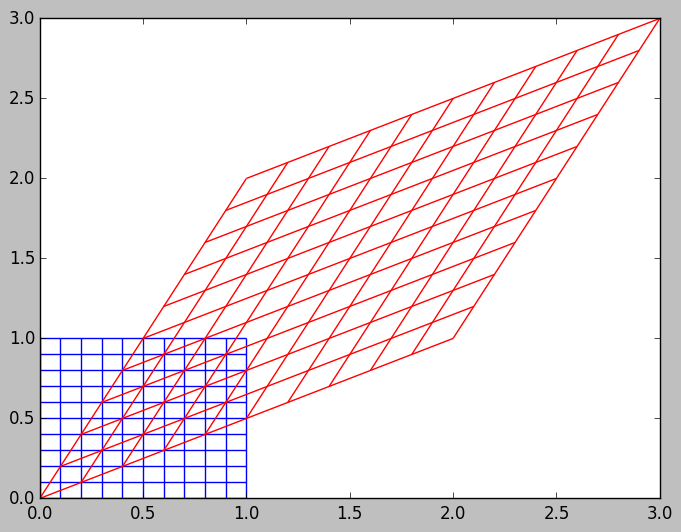

In [1]:
from matplotlib import collections  as mc

A = np.array([[2, 1],
              [1, 2]])

n = 11
grid = (list(zip(zip(np.arange(0, 1.001, 0.1), [0] * n),
                zip(np.arange(0, 1.001, 0.1), [1] * n))) +
        list(zip(zip([0] * n, np.arange(0, 1.001, 0.1)),
                 zip([1] * n, np.arange(0, 1.001, 0.1)))))
warped = [(np.dot(A, p), np.dot(A, q)) for p, q in grid]

fig, ax = plt.subplots()
ax.add_collection(mc.LineCollection(grid, color='b'))
ax.add_collection(mc.LineCollection(warped, color='r'))
ax.autoscale()
fig

Les vecteurs propres de $A$ correspondront à deux vecteurs de l'espace uniforme dont la direction ne serait pas affectée par le "warp" (tout autre vecteur que ces deux-là verrait sa direction changer par le "warp"):

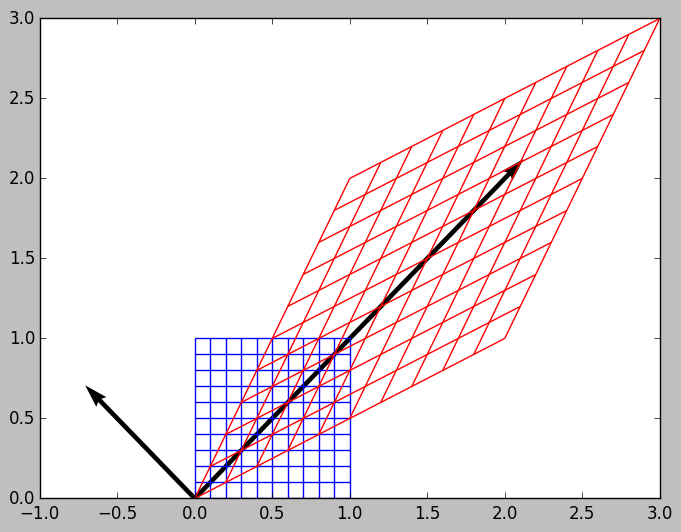

In [2]:
w, v = np.linalg.eig(A)
vw = v * w
ax.quiver((0, 0), (0, 0), vw[0], vw[1], 
          angles='xy', scale_units='xy', scale=1)
ax.set_xlim(xmin=-1)
fig

Donc si on génère un dataset gaussien dont la covariance est $A$, ses vecteurs propres devraient définir la forme de la distribution (i.e. en constituer les "composantes principales", dont on pourrait se servir pour faire une PCA):

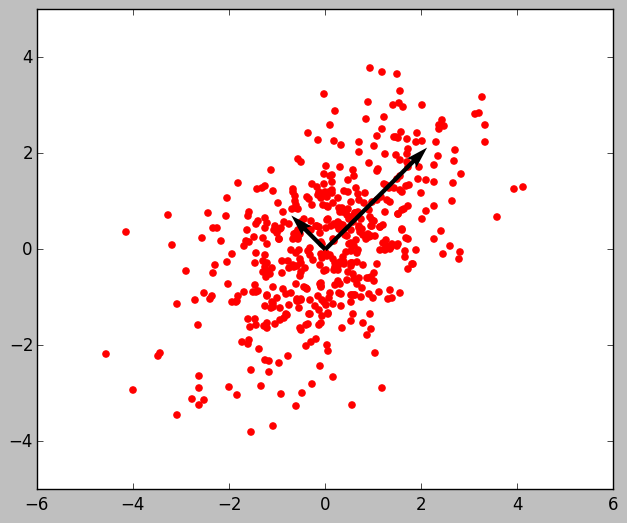

In [3]:
pts = np.random.multivariate_normal(mean=(0, 0), cov=A, size=500)
fig, ax = plt.subplots()
ax.scatter(pts[:, 0], pts[:, 1], color='r')
ax.set_aspect('equal')
ax.quiver((0, 0), (0, 0), vw[0], vw[1], 
          angles='xy', scale_units='xy', scale=1)
fig